Gradient Calculation with AutoGrad

In [11]:
import torch
x = torch.randn(3, requires_grad=True)
print(x)
y = x+2
print(y)

tensor([-1.3974, -0.7446,  0.9712], requires_grad=True)
tensor([0.6026, 1.2554, 2.9712], grad_fn=<AddBackward0>)


In [12]:
z = y*y*2
print(z)

tensor([ 0.7262,  3.1519, 17.6563], grad_fn=<MulBackward0>)


In [13]:
z = z.mean()
print(z)

tensor(7.1781, grad_fn=<MeanBackward0>)


In [14]:
z.backward() # dz/dx

In [15]:
print(x.grad)

tensor([0.8034, 1.6738, 3.9616])


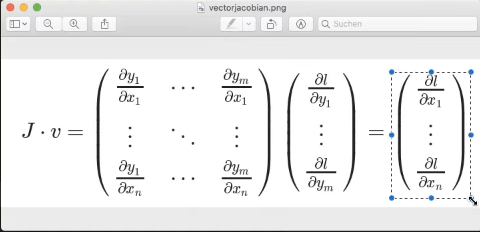

In [16]:
z = y*y*2
print(z)

tensor([ 0.7262,  3.1519, 17.6563], grad_fn=<MulBackward0>)


In [20]:
v = torch.tensor([0.1,1.0,0.001],dtype=torch.float32)
z.backward(v)
print(x.grad)

tensor([1.0444, 6.6953, 3.9735])


**PREVENTING GRADIENT HISTORY**

Prevent from tracking the gradient
There are three ways to prevent pytorch from tracking the gradients
1.   x.requires_grad=False
2.   x.detach()
3.   using with statement with torch.no_grad():



In [22]:
import torch
x = torch.randn(3, requires_grad=True)
y = x.detach()
print(x)
print(y)

tensor([-0.8888, -2.2387, -0.0591], requires_grad=True)
tensor([-0.8888, -2.2387, -0.0591])


In [23]:
import torch
x = torch.randn(3, requires_grad=False)

print(x)

tensor([ 1.5922, -0.5821, -0.2238])


In [24]:
import torch
x = torch.randn(3, requires_grad=True)
with torch.no_grad():
  y = x+2
  print(y)

tensor([0.7032, 2.7635, 0.6449])


**TRAINING EXAMPLE**

In [29]:
import torch
weights = torch.ones(4, requires_grad=True)
for epoch in range(7):
  model_output = (weights*3).sum()

  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## **OPTIMIZATION**

In [32]:
import torch
#weights = torch.ones(4, requires_grad=True)
